# Tutorial -1 

# File Handling using rdKit

# Reading and Writing Smiles using rdKit

This is a short overview of reading, creating smiles from different file types and writing molecules to various file formats. It is intended to be a complement to, not replacement for, the contents of the [main RDKit documentation](http://rdkit.org/docs/index.html)

Credits to @iwatobipen [https://github.com/iwatobipen];  @rdkit [https://github.com/rdkit]

@TAGS: #basics #molecule_input #rdKitTutorials #Smiles #CADD

In [1]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.six import StringIO
# uncomment this if you try the tutorial and end up with low-quality images
# IPythonConsole.ipython_useSVG=True

## Working with SMILES

Reading a SMILES string using MolFromSmiles:

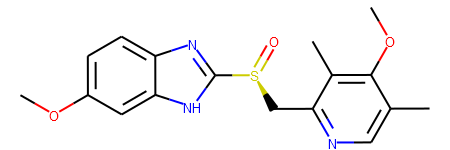

In [2]:
mol1 = Chem.MolFromSmiles('COc1ccc2c(c1)[nH]c(n2)[S@@](=O)Cc1ncc(c(c1C)OC)C')
mol1

In [3]:
m2 = Chem.MolFromSmiles('COc1ccc2c(c1)[nH]c(n2)[S@@](=O)Cc1ncc(c(c1C)OC)C')
print(Chem.MolToMolBlock(m2))


     RDKit          2D

 24 26  0  0  0  0  0  0  0  0999 V2000
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7537    2.4138    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1240    1.8037    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9672    0.3119    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -4.4231    2.5537    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
   -5.7221    1.8037    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -4.4231    4.0537    0

Adjusting Hydrogens and removing them

In [61]:
mol_exampleH = Chem.AddHs(m2)
mol_examplenoH = Chem.RemoveHs(mol_exampleH)
print(m2.GetNumAtoms(),mol_exampleH.GetNumAtoms(), mol_examplenoH.GetNumAtoms())

24 43 24


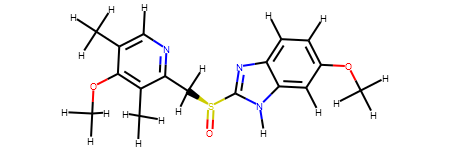

In [62]:
mol_exampleH

In [63]:
print((Chem.MolToMolBlock(mol_examplenoH)),file=open('foo.mol','w+'))

Writing molecules in SD and SMI formats

In [189]:
w1 = Chem.SDWriter('./data/data_set.sdf')
w1.write(mol_exampleH)
w1.close()

In [190]:
w2 = Chem.SmilesWriter('./data/data_set.smi')
w2.write(mol_exampleH)
w2.close()
s1 = Chem.SmilesMolSupplier('./data/data_set.smi')
print(s1)

In [161]:
mol1 = Chem.MolFromSmiles("Cc1ccccc1")
mol2 = Chem.MolFromSmiles("Clc1ccccc1")

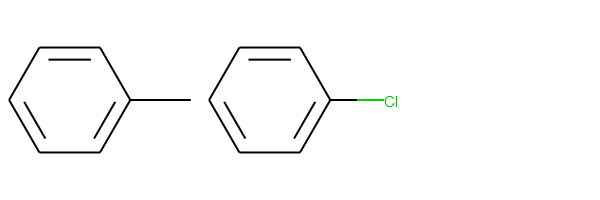

In [162]:
Draw.MolsToGridImage([mol1, mol2])

In [154]:
fp1 = AllChem.GetMorganFingerprint(mol1, 2)
fp2 = AllChem.GetMorganFingerprint(mol2, 2)

In [155]:
DataStructs.TanimotoSimilarity(fp1, fp2)

0.2222222222222222

## Reading Smiles Files from CSV/txt format

In [177]:
#Source file from "https://github.com/iwatobipen/substrate-scope-plot/tree/master/data"
import pandas as pd
import numpy
df = pd.read_csv('./data/mps.csv', sep=';')

In [178]:
df.head(5)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID
0,CHEMBL3092035,NaN,0,412.49,0,4.89,28,COc1cc(ccc1Nc2ncc3cccc(c4ccccc4)c3n2)N5CCOCC5,IC50,'=',...,CHEMBL394,HCT-116,Homo sapiens,CELL-LINE,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,CHEMBL3308372
1,CHEMBL3092030,NaN,0,484.63,0,3.77,17,COc1cc(ccc1Nc2ncc3ccn(C4CCCCC4)c3n2)N5CCN(CC5)...,IC50,'=',...,CHEMBL394,HCT-116,Homo sapiens,CELL-LINE,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,CHEMBL3308372
2,CHEMBL3092038,NaN,0,490.59,0,3.53,31,COc1cc(ccc1Nc2ncc3cccc(c4cccnc4)c3n2)N5CCN(CC5...,IC50,'=',...,CHEMBL3983,Dual specificity protein kinase TTK,Homo sapiens,SINGLE PROTEIN,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,NaN
3,CHEMBL3092037,NaN,0,489.60,0,4.13,30,COc1cc(ccc1Nc2ncc3cccc(c4ccccc4)c3n2)N5CCN(CC5...,IC50,'=',...,CHEMBL3983,Dual specificity protein kinase TTK,Homo sapiens,SINGLE PROTEIN,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,NaN
4,CHEMBL3092033,NaN,0,479.57,0,2.65,20,COc1cc(ccc1Nc2ncc3ccn(c4cccnc4)c3n2)N5CCN(CC5)...,IC50,'>',...,CHEMBL3983,Dual specificity protein kinase TTK,Homo sapiens,SINGLE PROTEIN,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,NaN


In [179]:
df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID'],
      dtype='object')

In [180]:
mols = [Chem.MolFromSmiles(smi) for smi in df.Smiles]

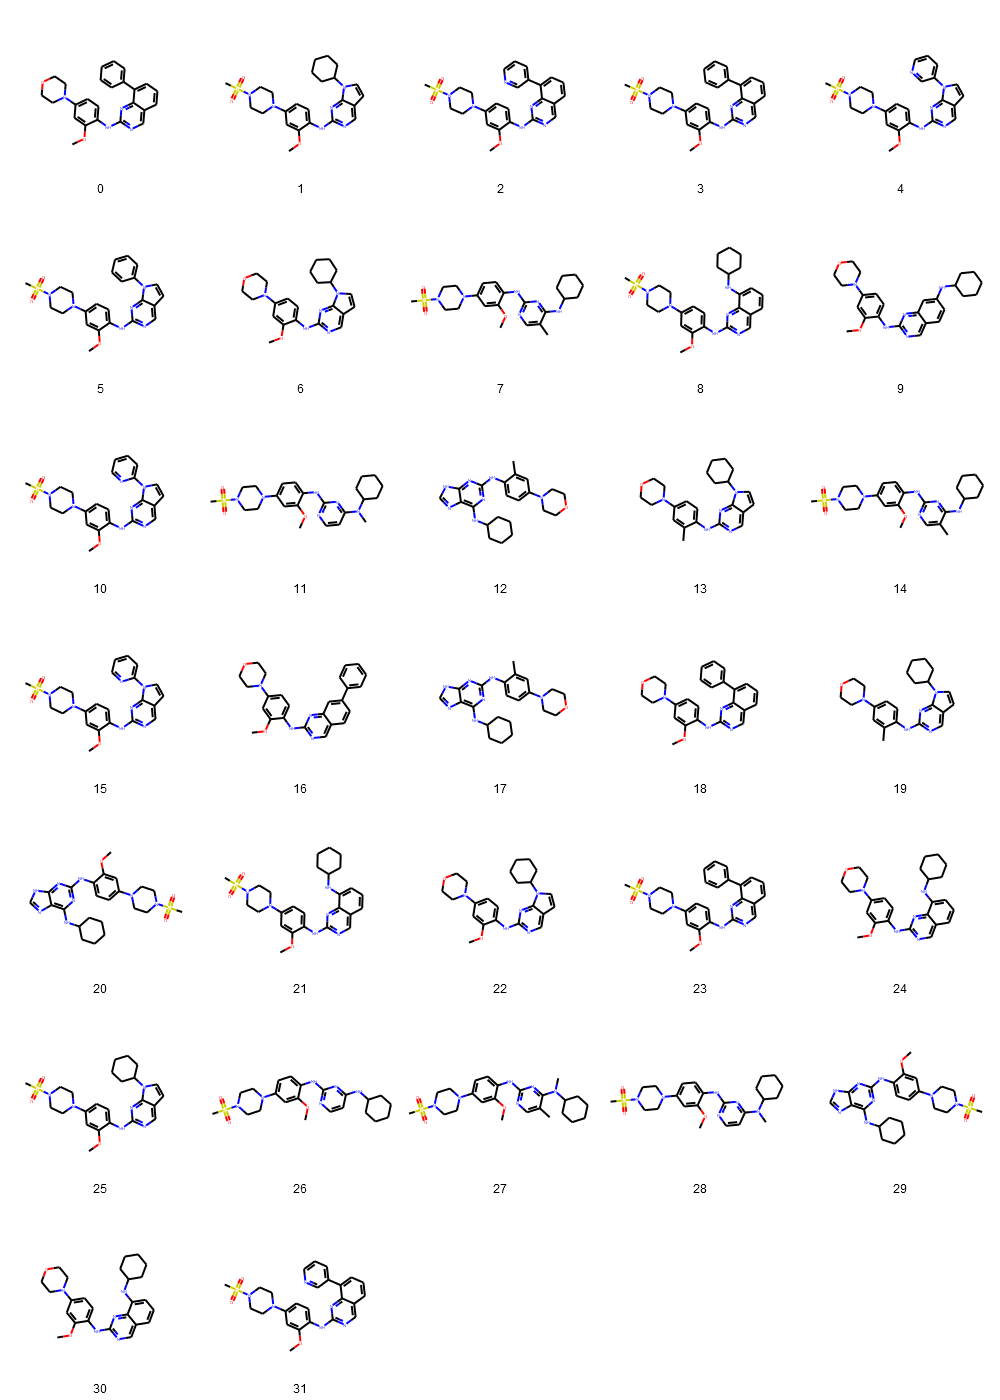

In [181]:
Draw.MolsToGridImage(mols, molsPerRow=5, legends=[str(i) for i in range(len(mols))])

In [182]:
df.head(5)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID
0,CHEMBL3092035,NaN,0,412.49,0,4.89,28,COc1cc(ccc1Nc2ncc3cccc(c4ccccc4)c3n2)N5CCOCC5,IC50,'=',...,CHEMBL394,HCT-116,Homo sapiens,CELL-LINE,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,CHEMBL3308372
1,CHEMBL3092030,NaN,0,484.63,0,3.77,17,COc1cc(ccc1Nc2ncc3ccn(C4CCCCC4)c3n2)N5CCN(CC5)...,IC50,'=',...,CHEMBL394,HCT-116,Homo sapiens,CELL-LINE,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,CHEMBL3308372
2,CHEMBL3092038,NaN,0,490.59,0,3.53,31,COc1cc(ccc1Nc2ncc3cccc(c4cccnc4)c3n2)N5CCN(CC5...,IC50,'=',...,CHEMBL3983,Dual specificity protein kinase TTK,Homo sapiens,SINGLE PROTEIN,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,NaN
3,CHEMBL3092037,NaN,0,489.60,0,4.13,30,COc1cc(ccc1Nc2ncc3cccc(c4ccccc4)c3n2)N5CCN(CC5...,IC50,'=',...,CHEMBL3983,Dual specificity protein kinase TTK,Homo sapiens,SINGLE PROTEIN,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,NaN
4,CHEMBL3092033,NaN,0,479.57,0,2.65,20,COc1cc(ccc1Nc2ncc3ccn(c4cccnc4)c3n2)N5CCN(CC5)...,IC50,'>',...,CHEMBL3983,Dual specificity protein kinase TTK,Homo sapiens,SINGLE PROTEIN,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,NaN


In [187]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(df, 'Smiles', 'Molecule', includeFingerprints=True)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Molecule
0,CHEMBL3092035,NaN,0,412.49,0,4.89,28,COc1cc(ccc1Nc2ncc3cccc(c4ccccc4)c3n2)N5CCOCC5,IC50,'=',...,HCT-116,Homo sapiens,CELL-LINE,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,CHEMBL3308372,
1,CHEMBL3092030,NaN,0,484.63,0,3.77,17,COc1cc(ccc1Nc2ncc3ccn(C4CCCCC4)c3n2)N5CCN(CC5)S(=O)(=O)C,IC50,'=',...,HCT-116,Homo sapiens,CELL-LINE,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,CHEMBL3308372,
2,CHEMBL3092038,NaN,0,490.59,0,3.53,31,COc1cc(ccc1Nc2ncc3cccc(c4cccnc4)c3n2)N5CCN(CC5)S(=O)(=O)C,IC50,'=',...,Dual specificity protein kinase TTK,Homo sapiens,SINGLE PROTEIN,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,NaN,
3,CHEMBL3092037,NaN,0,489.60,0,4.13,30,COc1cc(ccc1Nc2ncc3cccc(c4ccccc4)c3n2)N5CCN(CC5)S(=O)(=O)C,IC50,'=',...,Dual specificity protein kinase TTK,Homo sapiens,SINGLE PROTEIN,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,NaN,
4,CHEMBL3092033,NaN,0,479.57,0,2.65,20,COc1cc(ccc1Nc2ncc3ccn(c4cccnc4)c3n2)N5CCN(CC5)S(=O)(=O)C,IC50,'>',...,Dual specificity protein kinase TTK,Homo sapiens,SINGLE PROTEIN,CHEMBL3091390,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2013,NaN,

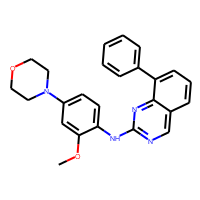
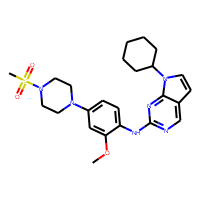
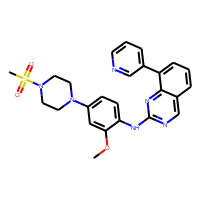
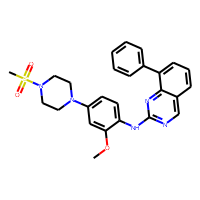
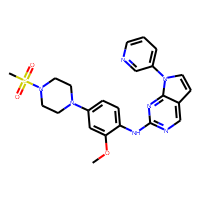

In [188]:
df.head(5)